In [12]:
import os
import numpy as np
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from PIL import ImageOps
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
input_dir = "D:\\FoodSeg103\\FoodSeg103\\Images\\img_dir\\train"
target_dir = "D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train"

img_size = (160, 160)
num_classes = 104
batch_size = 2

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 4983
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000000.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000000.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000001.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000001.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000002.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000002.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000003.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000003.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000004.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000004.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000005.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000005.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000006.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000006.png
D:\FoodSeg103\FoodSeg103\Images\img_dir\train\00000007.jpg | D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00000007.png
D:\FoodSeg103\Fo

In [2]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets_fix(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = np.array(img)/255.
        y = np.zeros((self.batch_size,) + self.img_size + (104,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            img_array = np.array(img)
            for z in np.unique(img_array):
                if z ==0:
                    continue
                label_mask = np.where(img_array==z,1,0)
                y[j,:,:,z] = label_mask  
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
        return x, y

In [3]:
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets_fix(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets_fix(batch_size, img_size, val_input_img_paths, val_target_img_paths)
test_train_gen =  OxfordPets_fix(
    batch_size, img_size, train_input_img_paths[0:32], train_target_img_paths[0:32]
)

In [4]:
model = keras.models.load_model("oxford_segmentation_fix_v10.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 80, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 80, 80, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [5]:
val_gen = OxfordPets_fix(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen[2][0])

In [249]:
val_gen[2][0].shape

(2, 160, 160, 3)

(160, 160, 3)


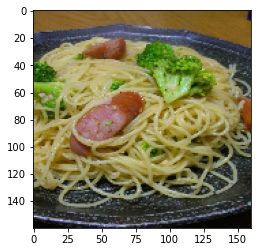

In [251]:
img = val_gen[2][0][0]
print(img.shape)
plt.imshow(img)

'D:\\FoodSeg103\\FoodSeg103\\Images\\img_dir\\train\\00006784.jpg'

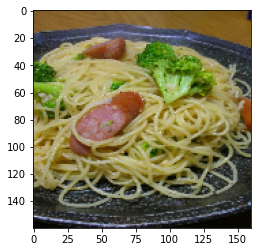

In [242]:
i =4
img_o = load_img(val_input_img_paths[i], target_size=img_size)
plt.imshow(img_o)
val_input_img_paths[4]

[ 0 49 65 87]
D:\FoodSeg103\FoodSeg103\Images\ann_dir\train\00006784.png


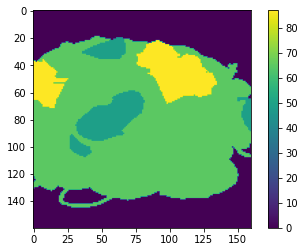

In [252]:
from PIL import Image
img = load_img(val_target_img_paths[4], target_size=img_size, color_mode="grayscale")
test_img = Image.fromarray(np.array(img))
test_img.save('test_img.jpg')
plt.imshow(test_img)
plt.colorbar()
print(np.unique(np.array(img)))
print(val_target_img_paths[4])

In [225]:
color_list = np.array(
    [ [210, 55, 55],  
     [210, 210, 55],
     [55, 210, 55],
     [55, 210, 210],
     [55, 55, 210],
     [171, 55, 210],
     [210, 55, 133],
    ] )
color_index=["紅色", "黃色", "綠色", "天空色", "藍色", "紫色", "粉紅色"]

color_list[0][0]
color_index[0]

'紅色'

In [201]:
def color_mask(path):
    img_a = cv2.imread(path)
    img_a = cv2.resize(img_a, (160,160) )
    rgb = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
    rgb_test = rgb
    print(rgb.shape)
    label = np.unique(np.array(img))
    print(label)
    
    color_index = 0;
    for z in label:
        if z ==0:
            continue
        rgb_test[:,:,0] = np.where(rgb[:,:,0]==z, color_list[color_index][0], rgb[:,:,0])
        rgb_test[:,:,1] = np.where(rgb[:,:,1]==z, color_list[color_index][1], rgb[:,:,1])
        rgb_test[:,:,2] = np.where(rgb[:,:,2]==z, color_list[color_index][2], rgb[:,:,2])
        color_index+=1
         
        
    rgb_test = Image.fromarray(rgb_test)

    rgb_test.save('rgb_test.jpg')
    plt.imshow(rgb_test)
    return color_index

In [238]:
def color_mask_pred(path, path_real):
    img_a = cv2.imread(path)
    img_a = cv2.resize(img_a, (160,160) )
    rgb = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
    rgb_test = rgb
    print(rgb.shape)
    img = load_img(path_real, target_size=img_size)
    label = np.unique(np.array(img))
    print(label)
    
    color_index = 0;
    for z in label:
        if z ==0:
            continue
        rgb_test[:,:,0] = np.where(rgb[:,:,0]==z, color_list[color_index][0], rgb[:,:,0])
        rgb_test[:,:,1] = np.where(rgb[:,:,1]==z, color_list[color_index][1], rgb[:,:,1])
        rgb_test[:,:,2] = np.where(rgb[:,:,2]==z, color_list[color_index][2], rgb[:,:,2])
        color_index+=1
        

    
    rgb_test = Image.fromarray(rgb_test)

    rgb_test.save('rgb_test_pred.jpg')
    plt.imshow(rgb_test)
    return color_index

In [173]:
def color_show(path_a, path_b):   
    img_a = cv2.imread(path_a)
    img_a = cv2.resize(img_a, (160,160) )
    img_b = cv2.imread(path_b)
    img_b = cv2.resize(img_b, (160,160) )
    # cv2.waitKey(0)
    # cv2.imshow('mg_A',img_a)
    # cv2.destroyAllWindows()

    dst = cv2.addWeighted(img_a, 0.9, img_b, 0.5, 5.0)
    gray = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    img_b=cv2.cvtColor(img_b,cv2.COLOR_BGR2RGB)
    img_a=cv2.cvtColor(img_a,cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, 1)
    plt.title('pred')
    plt.imshow(gray)
    plt.subplot(2, 3, 2)
    plt.title('img')
    plt.imshow(img_b)
    plt.subplot(2, 3, 3)
    plt.title('mask')
    plt.imshow(img_a) 

In [243]:
print(test.shape)

(160, 160, 104)


(160, 160, 3)


array([[49., 49., 49., ...,  0.,  0., 49.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [65.,  0.,  0., ...,  0.,  0.,  0.],
       [65.,  0.,  0., ...,  0.,  0.,  0.],
       [65.,  0.,  0., ..., 49., 49., 49.]])

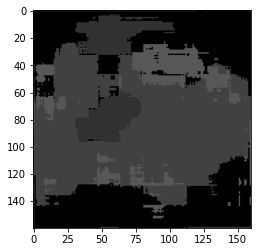

In [244]:

pred_mask = np.zeros((160,160,3))
test_mask = test[:,:,65]
pred_mask_50 = np.where(test_mask > np.percentile(test_mask,50),65,pred_mask_50)
pred_mask[:,:,0]=pred_mask_50
pred_mask[:,:,1]=pred_mask_50
pred_mask[:,:,2]=pred_mask_50

test_mask = test[:,:,49]
pred_mask_50 = np.where(test_mask > np.percentile(test_mask,90),49,pred_mask_50)
pred_mask[:,:,0]=pred_mask_50
pred_mask[:,:,1]=pred_mask_50
pred_mask[:,:,2]=pred_mask_50

test_mask = test[:,:,87]
pred_mask_50 = np.where(test_mask > np.percentile(test_mask,90),87,pred_mask_50)
pred_mask[:,:,0]=pred_mask_50
pred_mask[:,:,1]=pred_mask_50
pred_mask[:,:,2]=pred_mask_50

print(pred_mask.shape)
pred_mask_50_img = Image.fromarray(pred_mask.astype('uint8'))
pred_mask_50_img.save("pred_mask_50_img.jpg")
plt.imshow(pred_mask.astype('uint8'))
pred_mask[:,:,0]

In [158]:
import collections

(160, 160, 104)
-----------


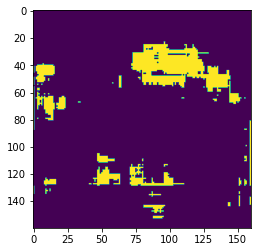

In [119]:
test = val_preds[0]
test_mask = test[:,:,87]
test_threshold = np.where(test_mask > np.percentile(test_mask,90),1,0)
# test_threshold = np.where(test_mask,1,0)
# test_threshold = np.where(test_mask ,test_mask,0)
print(test.shape)
print("-----------")

plt.imshow(test_threshold)
# test[:,:,47].shape

(160, 160, 3)
[ 0 49 65 87]
3


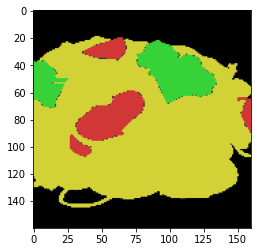

In [208]:
color_index = color_mask(val_target_img_paths[4])
print(color_index)

In [254]:
val_target_img_paths[4]

'D:\\FoodSeg103\\FoodSeg103\\Images\\ann_dir\\train\\00006784.png'

(160, 160, 3)
[ 0 49 65 87]
3


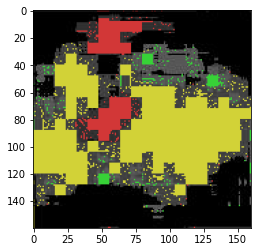

In [240]:
color_index=color_mask_pred('pred_mask_50_img.jpg',val_target_img_paths[4])
print(color_index)

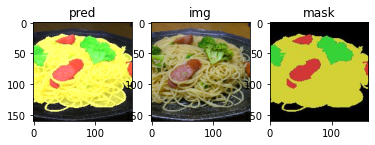

In [189]:
color_show("rgb_test.jpg",val_input_img_paths[4])

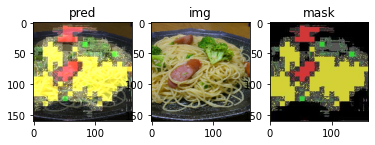

In [190]:
color_show("rgb_test_pred.jpg",val_input_img_paths[4])

## 實際

In [230]:
color_index=["紅色", "黃色", "綠色", "天空色", "藍色", "紫色", "粉紅色"]
img = load_img(val_target_img_paths[4], target_size=img_size, color_mode="grayscale")
img_array = np.array(img)
unique, counts = np.unique(img_array, return_counts=True)
color_label = 0;
for i,j in zip(unique, counts):
    if i ==0:
        print("背景: "+str(j))
        continue
    print(str(color_index[color_label]) +": "+str(j) )
    color_label+=1
print(img_array.shape)

背景: 8868
紅色: 1718
黃色: 12905
綠色: 2109
(160, 160)


# 預測


In [231]:

unique, counts = np.unique(pred_mask[:,:,0], return_counts=True)
color_label = 0;
for i,j in zip(unique, counts):
    if i ==0:
        print("背景: "+str(j))
        continue
    print(str(color_index[color_label]) +": "+str(j) )
    color_label+=1
print(img_array.shape)

背景: 9285
紅色: 2558
黃色: 11197
綠色: 2560
(160, 160)


In [253]:
pred_mask[:,:,0]

array([[49., 49., 49., ...,  0.,  0., 49.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [65.,  0.,  0., ...,  0.,  0.,  0.],
       [65.,  0.,  0., ...,  0.,  0.,  0.],
       [65.,  0.,  0., ..., 49., 49., 49.]])